IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df=df.iloc[::-1]
df.head(20)



,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2029,2010-07-28,118.00,120.50,117.20,118.15,118.25,835593,994.01
2028,2010-07-29,112.50,121.70,112.50,117.50,116.60,2359134,2791.03
2027,2010-07-30,116.50,118.00,114.60,115.85,116.05,2656191,3112.68
2026,2010-08-02,117.30,118.50,116.60,118.10,117.30,663593,779.85
2025,2010-08-03,118.30,119.95,117.90,118.65,118.30,611234,726.78


PLOT FOR VARIOUS TIME SERIES DATA 

Text(0.5, 1.0, 'Open')

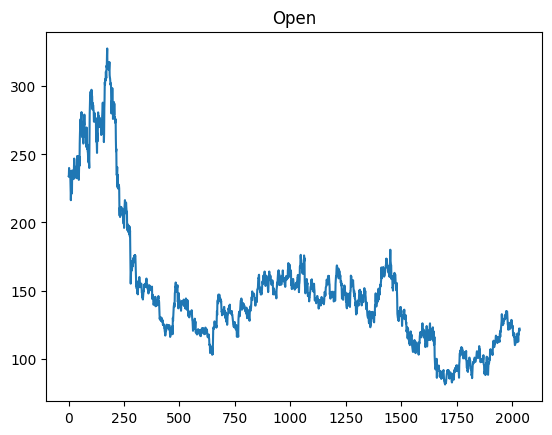

In [ ]:
import matplotlib.pyplot as plt
# Create a line plot
x=df['Open']
plt.plot(x)

# Add labels and title
plt.title('Open')

Text(0.5, 1.0, 'High')

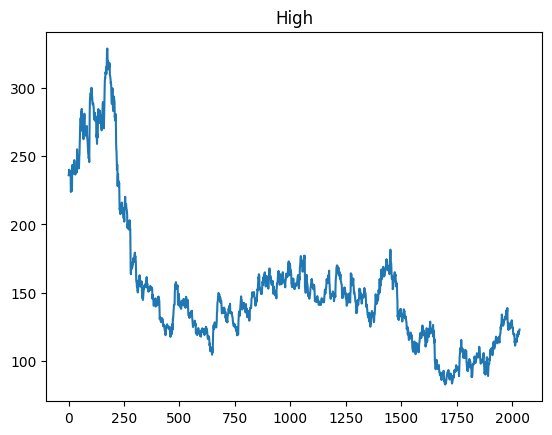

In [ ]:
import matplotlib.pyplot as plt
# Create a line plot
x=df['High']
plt.plot(x)

# Add labels and title
plt.title('High')

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
#Data Preprocessing
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
duplicates= df.duplicated()
duplicates.value_counts()
# no duplicates are present

False    2035
dtype: int64

<ipython-input-11-40557f091158>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

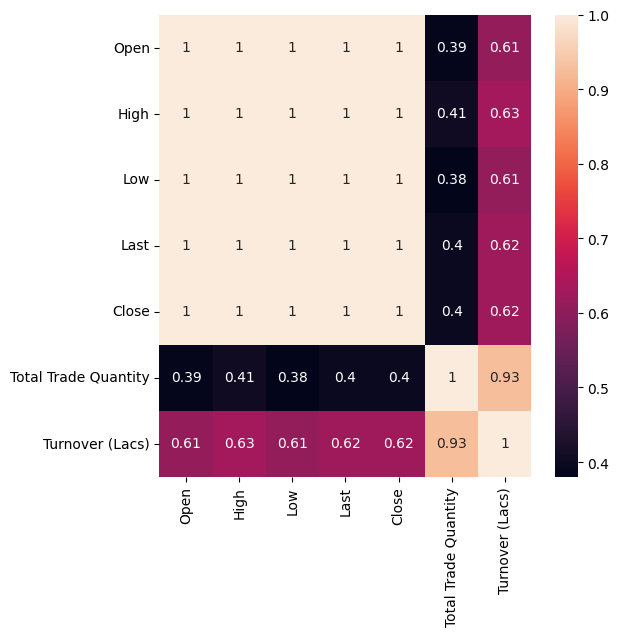

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

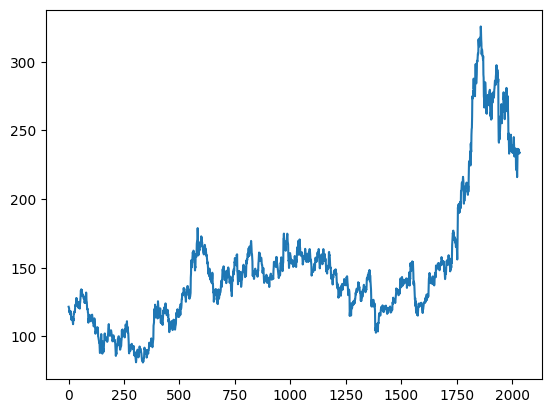

In [ ]:
df1=df.reset_index()['Close']
plt.plot(df1)

In [ ]:
df1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [ ]:
#actually lstm's are very to scale of the data, so apply minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

Text(0.5, 1.0, 'Standardized close values')

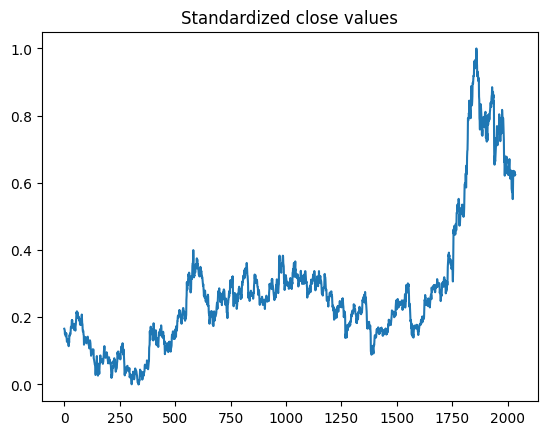

In [ ]:
plt.plot(df1)
plt.title("Standardized close values")

In [ ]:
#Split the data into train and test split
training_size = int(len(df1) * 0.85)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
test_size

306

PREPROCESS DATA

In [ ]:
#DATA PREPROCESSING
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 150
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train)

[[0.16584967 0.16319444 0.1621732  ... 0.08455882 0.05535131 0.0620915 ]
 [0.16319444 0.1621732  0.14971405 ... 0.05535131 0.0620915  0.06311275]
 [0.1621732  0.14971405 0.15400327 ... 0.0620915  0.06311275 0.05861928]
 ...
 [0.13950163 0.15339052 0.16339869 ... 0.27859477 0.27593954 0.28472222]
 [0.15339052 0.16339869 0.16748366 ... 0.27593954 0.28472222 0.28860294]
 [0.16339869 0.16748366 0.1752451  ... 0.28472222 0.28860294 0.28227124]]


In [ ]:
x_test.shape

(155, 150)

In [ ]:
y_test.shape

(155,)

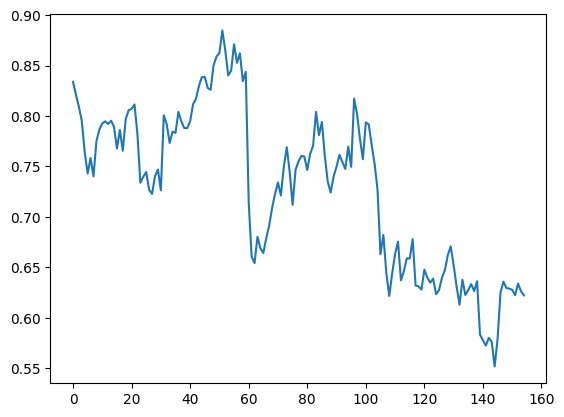

In [ ]:
plt.plot(y_test)

In [ ]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,activation='relu', input_shape=(150, 1)))
model.add(LSTM(units=50, return_sequences=False,activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
25/25 [==============================] - 18s 480ms/step - loss: 0.0227 - val_loss: 0.0338
Epoch 2/100
25/25 [==============================] - 11s 453ms/step - loss: 0.0026 - val_loss: 0.0063
Epoch 3/100
25/25 [==============================] - 11s 452ms/step - loss: 7.3482e-04 - val_loss: 0.0118
Epoch 4/100
25/25 [==============================] - 11s 448ms/step - loss: 5.8465e-04 - val_loss: 0.0114
Epoch 5/100
25/25 [==============================] - 10s 418ms/step - loss: 5.3779e-04 - val_loss: 0.0076
Epoch 6/100
25/25 [==============================] - 11s 413ms/step - loss: 5.2219e-04 - val_loss: 0.0071
Epoch 7/100
25/25 [==============================] - 12s 490ms/step - loss: 5.1160e-04 - val_loss: 0.0050
Epoch 8/100
25/25 [==============================] - 11s 451ms/step - loss: 5.2655e-04 - val_loss: 0.0030
Epoch 9/100
25/25 [==============================] - 11s 453ms/step - loss: 4.7325e-04 - val_loss: 0.0032
Epoch 10/100
25/25 [==============================] - 

In [ ]:
model.save('my_model1')

In [ ]:
#predictions
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
y_test1=y_test.reshape(-1,1)
y_test1 = scaler.inverse_transform(y_test1)

In [ ]:
y_train1=y_train.reshape(-1,1)
y_train1 = scaler.inverse_transform(y_train1)

In [ ]:
test_predict

array([[246.64877],
       [259.61926],
       [253.57881],
       [249.49094],
       [247.5336 ],
       [238.84657],
       [235.05829],
       [243.68466],
       [236.58426],
       [249.63383],
       [252.04016],
       [251.78885],
       [252.62141],
       [252.04771],
       [253.35147],
       [251.0526 ],
       [244.05615],
       [252.71457],
       [244.50569],
       [255.1797 ],
       [257.8228 ],
       [255.14258],
       [256.6595 ],
       [246.67363],
       [232.73892],
       [240.79126],
       [243.11858],
       [235.2327 ],
       [236.26144],
       [244.16481],
       [244.67125],
       [236.8044 ],
       [255.56955],
       [257.79343],
       [251.19244],
       [254.10246],
       [254.15352],
       [257.2296 ],
       [256.34506],
       [252.90732],
       [253.35313],
       [255.60861],
       [258.84518],
       [259.6842 ],
       [261.58362],
       [263.72754],
       [264.45453],
       [261.47333],
       [260.4969 ],
       [266.46832],


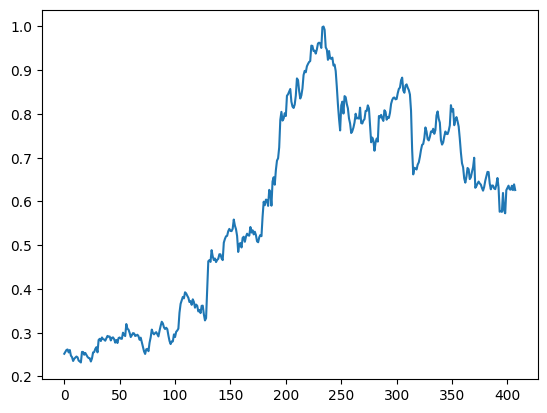

In [ ]:
plt.plot(y_test)

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train1, train_predict)))

2.7750154847492485


In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test1, test_predict))

18.93472626145916

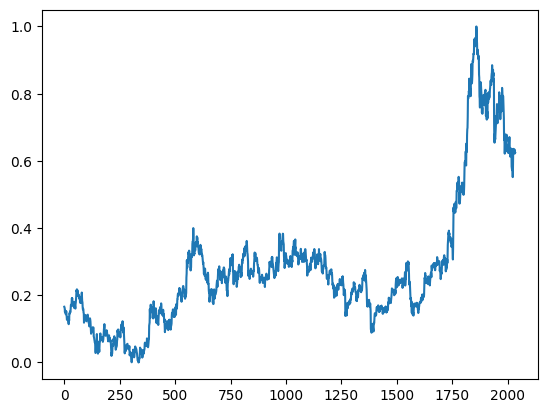

In [ ]:
plt.plot(df1)

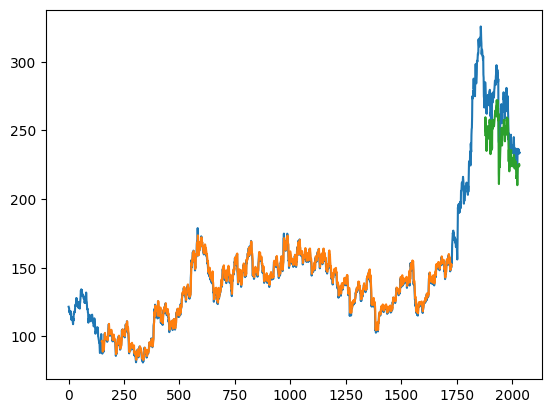

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=150
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

PREDICTED VALUES CONVERGE WITH THE ACTUAL VALUES SO OUR MODEL PERFORMANCE IS AS EXPECTED

In [ ]:
x_test

array([[[0.31372549],
        [0.3496732 ],
        [0.36172386],
        ...,
        [0.81372549],
        [0.81495098],
        [0.80596405]],

       [[0.3496732 ],
        [0.36172386],
        [0.37908497],
        ...,
        [0.81495098],
        [0.80596405],
        [0.83394608]],

       [[0.36172386],
        [0.37908497],
        [0.38582516],
        ...,
        [0.80596405],
        [0.83394608],
        [0.82107843]],

       ...,

       [[0.80923203],
        [0.79513889],
        [0.76388889],
        ...,
        [0.62888072],
        [0.62765523],
        [0.62234477]],

       [[0.79513889],
        [0.76388889],
        [0.74305556],
        ...,
        [0.62765523],
        [0.62234477],
        [0.63378268]],

       [[0.76388889],
        [0.74305556],
        [0.75837418],
        ...,
        [0.62234477],
        [0.63378268],
        [0.62622549]]])

In [ ]:
y_test1

array([[285.1 ],
       [281.95],
       [279.05],
       [275.6 ],
       [267.95],
       [262.85],
       [266.6 ],
       [262.15],
       [270.7 ],
       [273.5 ],
       [275.  ],
       [275.5 ],
       [274.85],
       [275.65],
       [274.15],
       [268.9 ],
       [273.4 ],
       [268.35],
       [276.05],
       [278.2 ],
       [278.5 ],
       [279.6 ],
       [272.4 ],
       [260.6 ],
       [262.05],
       [263.2 ],
       [258.85],
       [257.9 ],
       [262.2 ],
       [263.8 ],
       [258.75],
       [276.95],
       [274.8 ],
       [270.25],
       [273.  ],
       [272.7 ],
       [277.8 ],
       [275.5 ],
       [273.85],
       [273.85],
       [275.5 ],
       [279.65],
       [280.95],
       [284.1 ],
       [286.2 ],
       [286.3 ],
       [283.6 ],
       [283.15],
       [289.1 ],
       [291.2 ],
       [292.1 ],
       [297.55],
       [292.75],
       [286.65],
       [287.8 ],
       [294.2 ],
       [289.7 ],
       [292.  ],
       [285.25

In [ ]:
test_predict

array([[16986808.],
       [17173200.],
       [17018766.],
       [16855708.],
       [16706525.],
       [16399110.],
       [16174458.],
       [16287623.],
       [16092456.],
       [16336284.],
       [16419725.],
       [16424139.],
       [16414965.],
       [16384485.],
       [16420251.],
       [16381207.],
       [16192017.],
       [16362208.],
       [16200439.],
       [16466179.],
       [16573427.],
       [16574500.],
       [16619304.],
       [16365934.],
       [15918211.],
       [15964467.],
       [16027097.],
       [15832937.],
       [15733320.],
       [15849201.],
       [15879004.],
       [15647778.],
       [16237613.],
       [16252364.],
       [16030418.],
       [16130597.],
       [16172201.],
       [16390349.],
       [16348496.],
       [16300540.],
       [16331346.],
       [16425667.],
       [16608521.],
       [16682512.],
       [16818000.],
       [16930820.],
       [16968182.],
       [16899944.],
       [16919304.],
       [17194200.],


In [ ]:
len(test_data)

306

In [ ]:
x_input=test_data[206:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.58670014]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

2035

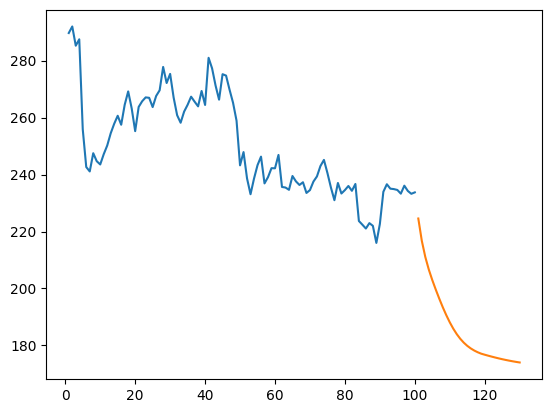

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

PREDICTION FOR NEXT 10 DAYS